In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [12]:
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import json

def draw_all_methods_cpu_cdf(target_node='master1_0'):
    methods = ['KaiS', 'UCB', 'generic', 'UCB_predict', 'DQN-based']
    SIGCOMM_COLORS = {
        'KaiS': '#1f77b4',        # 蓝
        'UCB': '#ff7f0e',         # 橙
        'generic': '#2ca02c',     # 绿
        'UCB_predict': '#d62728', # 红
        'DQN-based': '#9467bd',   # 紫
    }
    MARKERS = ['o', 's', '^', 'P', 'D', 'X', 'v', '*', '<', '>']

    sns.set_style('whitegrid')
    plt.rcParams['axes.linewidth'] = 1.2
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['legend.fontsize'] = 20
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.figure(figsize=(8, 5))

    quantiles = np.linspace(0.05, 0.95, 9)  # 9个marker，密度适中
    KaiS_data = []
    ucb_data = []

    legend_handles = []

    for idx, method in enumerate(methods):
        file_method = method 
        # with open(f'./result/cpu_usage_{file_method}.csv', 'r') as f:

        df = pd.read_csv(f'./result/cpu_usage_{file_method}.csv')
        now_node = target_node
        df = df[df['node'] == now_node]
        if method == 'KaiS':
            KaiS_data = deepcopy(df)
        elif method == 'UCB':
            ucb_data = deepcopy(df)
        # 绘制ecdf曲线
        sns.ecdfplot(
            df,
            x='cpu_usage',
            color=SIGCOMM_COLORS[method],
            linewidth=2.5
        )

        # 计算并加marker（空心，密度适中）
        cpu_values = np.sort(df['cpu_usage'].values)
        n = len(cpu_values)
        cdf_y = np.arange(1, n + 1) / n
        marker_x = []
        marker_y = []
        for q in quantiles:
            idx_q = np.searchsorted(cdf_y, q)
            idx_q = min(idx_q, n-1)
            marker_x.append(cpu_values[idx_q])
            marker_y.append(cdf_y[idx_q])
        plt.scatter(marker_x, marker_y,
                    facecolors='none',
                    edgecolors=SIGCOMM_COLORS[method],
                    marker=MARKERS[idx % len(MARKERS)],
                    s=90,
                    linewidths=2,
                    zorder=10)

        # 构造legend句柄
        handle = mlines.Line2D([], [], 
                               color=SIGCOMM_COLORS[method],
                               marker=MARKERS[idx % len(MARKERS)],
                               linestyle='-',
                               linewidth=2.5,
                               markersize=10,
                               markerfacecolor='none',
                               markeredgewidth=2,
                               markeredgecolor=SIGCOMM_COLORS[method],
                               label=method.replace('-', '').replace('_', ' '))
        legend_handles.append(handle)

    plt.xlabel('CPU Usage Rate', fontsize=20)
    plt.ylabel('CDF', fontsize=20)
    plt.legend(handles=legend_handles, frameon=False)
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.4)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.savefig(f'./result/cpu_usage_cdf_{target_node}.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    # 计算利用率UCB和 KaiS相比提升的比率
    print(f"UCB vs KaiS memory usage improvement for {target_node}:{KaiS_data['cpu_usage'].mean() / ucb_data['cpu_usage'].mean():.2f}")

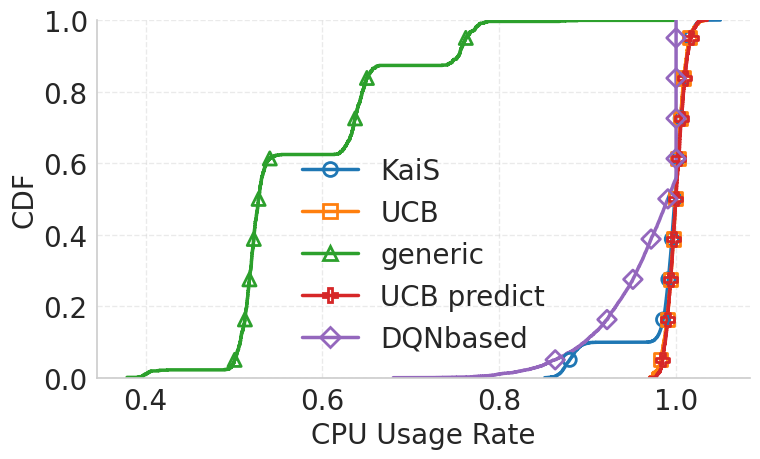

UCB vs KaiS memory usage improvement for master1_0:0.99


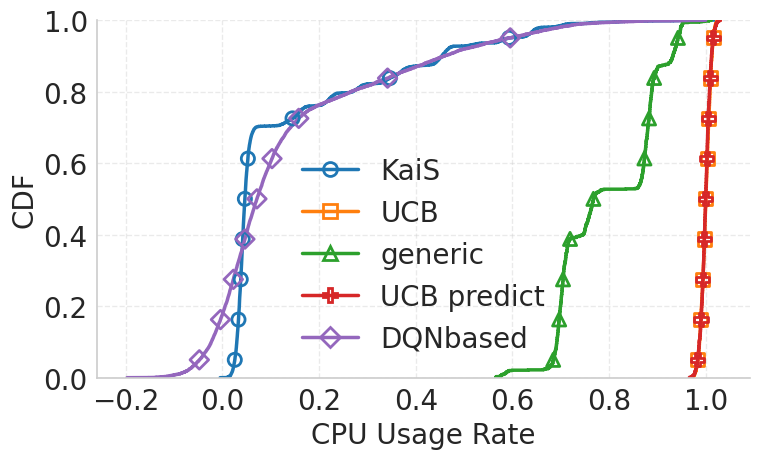

UCB vs KaiS memory usage improvement for master2_2:0.14


In [13]:
draw_all_methods_cpu_cdf('master1_0')  # 调用函数绘制所有方法的master1_0 CPU使用率的CDF图
draw_all_methods_cpu_cdf('master2_2')  # 调用函数绘制所有方法的master2_0 CPU使用率的CDF图

In [14]:
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

def draw_all_methods_mem_cdf(target_node='master1_0'):
    methods = ['KaiS', 'UCB', 'generic', 'UCB_predict', 'DQN-based']
    SIGCOMM_COLORS = {
        'KaiS': '#1f77b4',        # 蓝
        'UCB': '#ff7f0e',         # 橙
        'generic': '#2ca02c',     # 绿
        'UCB_predict': '#d62728', # 红
        'DQN-based': '#9467bd',   # 紫
    }
    MARKERS = ['o', 's', '^', 'P', 'D', 'v', '*', 'X', '<', '>']

    sns.set_style('whitegrid')
    plt.rcParams['axes.linewidth'] = 1.2
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['legend.fontsize'] = 20
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.figure(figsize=(8, 5))

    # 增加marker密度
    quantiles = np.linspace(0.05, 0.95, 10)  # 10个点，分布在CDF曲线上
    KaiS_data = []
    ucb_data = []
    generic_data = []
    legend_handles = []
    
    
    for idx, method in enumerate(methods):
        file_method = method 
        df = pd.read_csv(f'./result/mem_usage_{file_method}.csv')
        now_node = target_node
        df = df[df['node'] == now_node]
        if method == 'KaiS':
            KaiS_data = deepcopy(df)
        elif method == 'UCB':
            ucb_data = deepcopy(df)
        elif method == 'generic':
            generic_data = deepcopy(df)
        # 画普通ecdf曲线
        sns.ecdfplot(
            df,
            x='mem_usage',
            label=method.replace('-', '').replace('_', ' '),
            color=SIGCOMM_COLORS[method],
            linewidth=2.5
        )

        # 计算并加marker（空心）
        mem_values = np.sort(df['mem_usage'].values)
        n = len(mem_values)
        cdf_y = np.arange(1, n + 1) / n
        marker_x = []
        marker_y = []
        for q in quantiles:
            idx_q = np.searchsorted(cdf_y, q)
            idx_q = min(idx_q, n-1)
            marker_x.append(mem_values[idx_q])
            marker_y.append(cdf_y[idx_q])
        plt.scatter(marker_x, marker_y,
                    facecolors='none',
                    edgecolors=SIGCOMM_COLORS[method],
                    marker=MARKERS[idx % len(MARKERS)],
                    s=90,
                    linewidths=2,
                    zorder=10)
            # 构造legend句柄
        handle = mlines.Line2D([], [], 
                               color=SIGCOMM_COLORS[method],
                               marker=MARKERS[idx % len(MARKERS)],
                               linestyle='-',
                               linewidth=2.5,
                               markersize=10,
                               markerfacecolor='none',
                               markeredgewidth=2,
                               markeredgecolor=SIGCOMM_COLORS[method],
                               label=method.replace('-', '').replace('_', ' '))
        legend_handles.append(handle)

    plt.xlabel('Bandwidth Usage Rate', fontsize=20)
    plt.ylabel('CDF', fontsize=20)
    plt.legend(handles=legend_handles, frameon=False)
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.4)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.savefig(f'./result/trans_usage_cdf_{target_node}.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    # 计算利用率UCB和 KaiS相比提升的比率
    print(f"UCB vs KaiS memory usage improvement for {target_node}:{KaiS_data['mem_usage'].mean() / ucb_data['mem_usage'].mean():.2f}")
    print(f"generic vs KaiS memory usage improvement for {target_node}:{generic_data['mem_usage'].mean():.2f}")

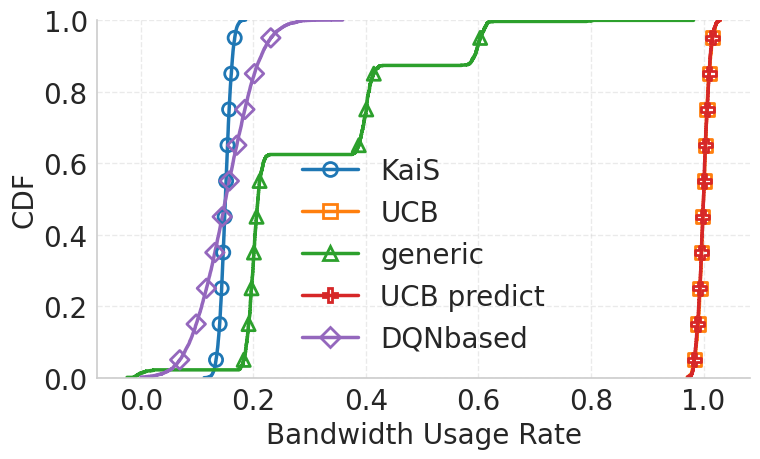

UCB vs KaiS memory usage improvement for master1_0:0.15
generic vs KaiS memory usage improvement for master1_0:0.30


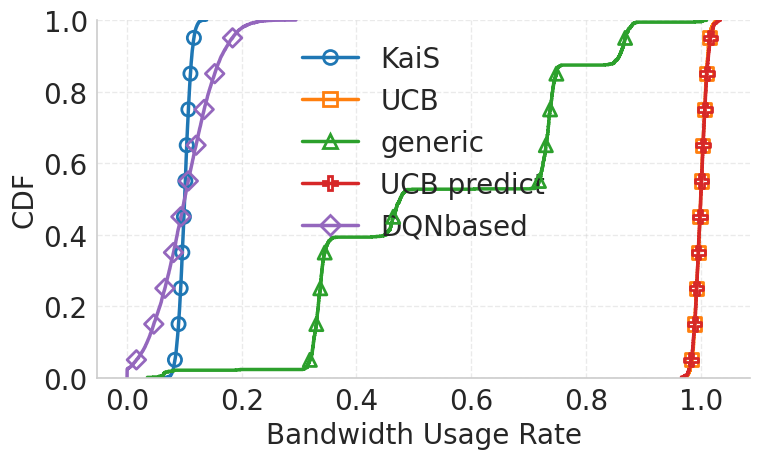

UCB vs KaiS memory usage improvement for master2_2:0.10
generic vs KaiS memory usage improvement for master2_2:0.55


In [15]:
draw_all_methods_mem_cdf('master1_0')  # 调用函数绘制所有方法的master1_0 CPU使用率的CDF图
draw_all_methods_mem_cdf('master2_2')  # 调用函数绘制所有方法的master2_0 CPU使用率的CDF图